<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Изучаю-дисбаланс-классов" data-toc-modified-id="Изучаю-дисбаланс-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изучаю дисбаланс классов</a></span></li><li><span><a href="#Кодирую-данные-столбцов-Geography-и-Gender-методом-OHE" data-toc-modified-id="Кодирую-данные-столбцов-Geography-и-Gender-методом-OHE-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Кодирую данные столбцов Geography и Gender методом OHE</a></span></li><li><span><a href="#Масштабирую-признаки-столбцов-CreditScore,-Balance,-EstimatedSalary" data-toc-modified-id="Масштабирую-признаки-столбцов-CreditScore,-Balance,-EstimatedSalary-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Масштабирую признаки столбцов CreditScore, Balance, EstimatedSalary</a></span></li><li><span><a href="#Изучаю-модели-без-учета-дисбаланса" data-toc-modified-id="Изучаю-модели-без-учета-дисбаланса-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Изучаю модели без учета дисбаланса</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Признаки**
- RowNumber —индекс строки в данных
- CustomerId— уникальный идентификатор клиента
- Surname —фамилия
- CreditScore —кредитный рейтинг
- Geography —страна проживания
- Gender —пол
- Age —возраст
- Tenure —сколько лет человек является клиентом банка
- Balance —баланс на счёте
- NumOfProducts —количество продуктов банка, используемых клиентом
- HasCrCard —наличие кредитной карты
- IsActiveMember —активность клиента
- EstimatedSalary —предполагаемая зарплата\
\
**Целевой признак**
- Exited— факт ухода клиента

## Подготовка данных

In [32]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [33]:
df = pd.read_csv('D:/DS/Churn.csv')
df.info()
display (df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


В столбце Tenure явно есть пропуски, изучаю этот столбец подробнее.

In [34]:
print (df['Tenure'].unique())

[ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0. nan]


В столбце Tenure есть пропуски, заполняю их случайными числами. В остальных столбцах могут содержаться важные сведения, поэтому пропущенные значения столбца Tenure не удаляю, а заполняю случайными числами.

In [35]:
df['Tenure'] = df['Tenure'].fillna(random.randint(0,10))
print (df['Tenure'].unique())

[ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0.]


## Исследование задачи

### Изучаю дисбаланс классов

Для подсчёта классов в целевом признаке применяю метод value_counts(). Делаю частоты относительными (от 0 до 1). Значения сохраняю в переменной class_frequency. Строю диаграмму.

0    0.7963
1    0.2037
Name: Exited, dtype: float64


<AxesSubplot:>

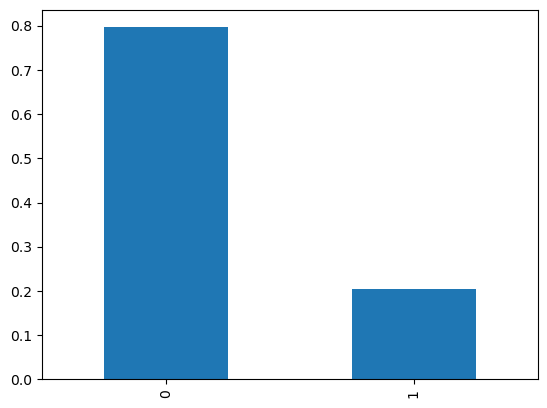

In [36]:
class_frequency = df['Exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

В целевом признаке наблюдается дисбаланс классов, нулей в 4 раза больше, чем единиц.

### Кодирую данные столбцов Geography и Gender методом OHE

In [37]:
print (df['Geography'].unique())
print (df['Gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [38]:
df_ohe =  pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
print (df_ohe.head(5))

   RowNumber  CustomerId   Surname  CreditScore  Age  Tenure    Balance  \
0          1    15634602  Hargrave          619   42     2.0       0.00   
1          2    15647311      Hill          608   41     1.0   83807.86   
2          3    15619304      Onio          502   42     8.0  159660.80   
3          4    15701354      Boni          699   39     1.0       0.00   
4          5    15737888  Mitchell          850   43     2.0  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1        101348.88       1   
1              1          0               1        112542.58       0   
2              3          1               0        113931.57       1   
3              2          0               0         93826.63       0   
4              1          1               1         79084.10       0   

   Geography_Germany  Geography_Spain  Gender_Male  
0                  0                0            0  
1         

**Разбиваю данные на выборки в соотношении 60-20-20.**

In [39]:
df_train, df_valid = train_test_split(df_ohe, test_size=0.4, random_state=12345) #сначала делю данные 60-40%
df_valid, df_test = train_test_split(df_valid, test_size=0.5, random_state=12345) #беру 40% и делю их пополам 

features_train = df_train.drop(['Exited', 'Surname', 'RowNumber', 'CustomerId'], axis=1)
target_train = df_train['Exited']

features_valid = df_valid.drop(['Exited', 'Surname', 'RowNumber', 'CustomerId'], axis=1)
target_valid = df_valid['Exited']

features_test = df_test.drop(['Exited', 'Surname', 'RowNumber', 'CustomerId'], axis=1)
target_test = df_test['Exited']

### Масштабирую признаки столбцов CreditScore, Balance, EstimatedSalary

In [40]:
numeric = ['CreditScore', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train.shape)
display (features_train.head(5))

(6000, 11)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,35,8.0,1.232271,1,1,0,-0.187705,0,1,1
3411,0.608663,37,8.0,0.600563,1,0,0,-0.333945,0,0,0
6027,2.052152,44,3.0,1.027098,2,0,1,1.503095,1,0,1
1247,-1.457915,24,6.0,-1.233163,2,1,0,-1.071061,0,0,1
3716,0.130961,27,2.0,1.140475,1,0,0,1.524268,1,0,0


### Изучаю модели без учета дисбаланса

**Изучаю модель решающего дерева**

Нахожу оптимальную глубину решающего дерева

In [41]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)

predictions_train = model.predict(features_train)
predictions_test = model.predict(features_test)

best_model = None
best_result = 0
f1_tree = []
depth_tree = []
for depth in range (1, 60):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    f1_tree.append(result)
    depth_tree.append(depth)
    if result > best_result:
        best_model = model
        best_result = result
        
print("F1 наилучшей модели на валидационной выборке:", best_result)
print (best_model)
#print (f1_tree)
#print (depth_tree)

F1 наилучшей модели на валидационной выборке: 0.5766526019690578
DecisionTreeClassifier(max_depth=9, random_state=12345)


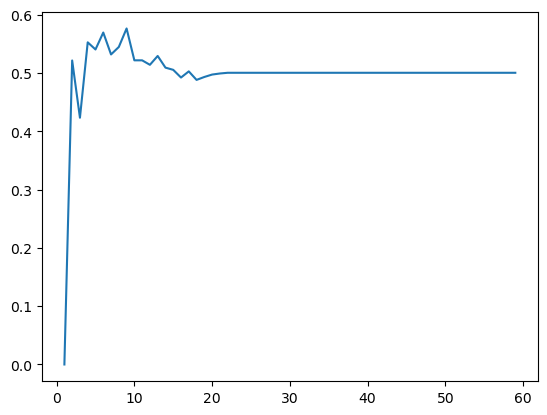

In [42]:
plt.plot(depth_tree, f1_tree)
plt.show()

Оптимальная глубина решающего дерева max_depth=9. С увеличением глубины метрика F1 сначала ухудшается, а потом перестает меняться.

**Строю ROC кривую для решающего дерева и рассчитываю AUC-ROC (насколько сильно модель отличается от случайной)**

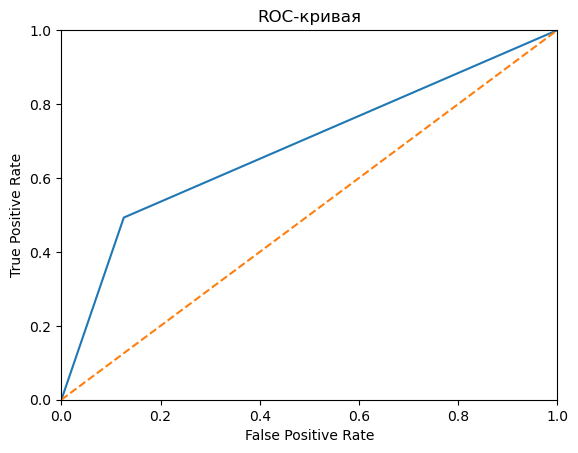

0.6835164137213509


In [43]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

#рассчитываю AUC-ROC
auc_roc = roc_auc_score(target_valid, probabilities_one_valid, multi_class='ovr')

print(auc_roc)

Из графика видно, что модель работает и отличается от случайной.

**Исследую алгоритм классификации Случайный лес**

Нахожу оптимальное количество деревьев и их глубину

In [63]:
%%time

best_model = None
best_result = 0
for est in range(1, 8):
    for depth in range(1, 8):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_model = model
            best_result = result

print("F1 наилучшей модели на валидационной выборке:", best_result)
print ("Какие гиперпараметры дали наилучший результат:", best_model)

F1 наилучшей модели на валидационной выборке: 0.593144560357675
Какие гиперпараметры дали наилучший результат: RandomForestClassifier(max_depth=7, n_estimators=7, random_state=12345)
Wall time: 1.56 s


**Строю ROC кривую для случайного леса и рассчитываю AUC-ROC (насколько сильно модель отличается от случайной)**

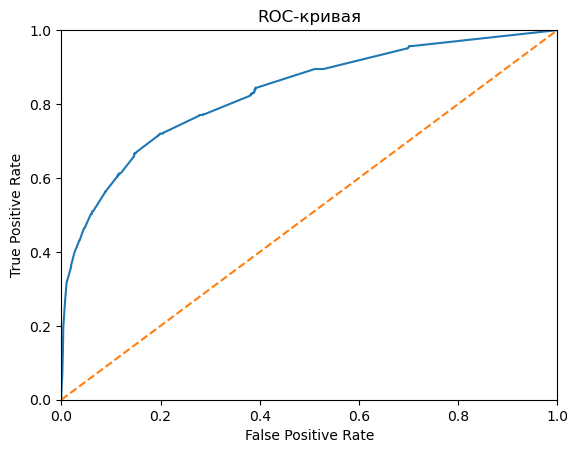

0.8303983510667254


In [45]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

#рассчитываю AUC-ROC
auc_roc = roc_auc_score(target_valid, probabilities_one_valid, multi_class='ovr')

print(auc_roc)

Из графика видно, что модель работает и сильно отличается от случайной.

**Исследую модель логистической регрессии**

In [46]:
model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1500)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predictions_valid)
print ('F1:', f1)

F1: 0.3288135593220339


**Строю ROC кривую для логистической регрессии и рассчитываю AUC-ROC (насколько сильно модель отличается от случайной)**

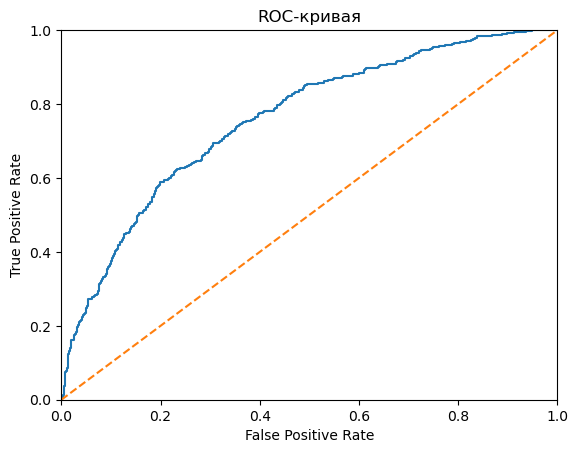

0.7579331474301201


In [47]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

#рассчитываю AUC-ROC
auc_roc = roc_auc_score(target_valid, probabilities_one_valid, multi_class='ovr')

print(auc_roc)

Из графика видно, что модель работает, и отличается от случайной.

## Борьба с дисбалансом

### Увеличиваю выборку для борьбы с дисбалансом

In [48]:
def upsample (features, target, repeat):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    repeat = 4
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled = shuffle (features_upsampled, random_state=12345)
    target_upsampled = shuffle (target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled
    
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)

(9588, 11)
(9588,)


**Запускаю модель случайного леса на увеличенной выборке**

In [49]:
%%time

best_model = None
best_result = 0
for est in range(1, 15):
    for depth in range(1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_model = model
            best_result = result

print("F1 наилучшей модели на валидационной выборке:", best_result)
print ("Какие гиперпараметры дали наилучший результат:", best_model)

F1 наилучшей модели на валидационной выборке: 0.622
Какие гиперпараметры дали наилучший результат: RandomForestClassifier(max_depth=7, n_estimators=12, random_state=12345)
Wall time: 7.26 s


В результате увеличения выборки F1 увеличилось.

**Строю ROC кривую для модели случайного леса на увеличенной выборке и рассчитываю AUC-ROC (насколько сильно модель отличается от случайной)**

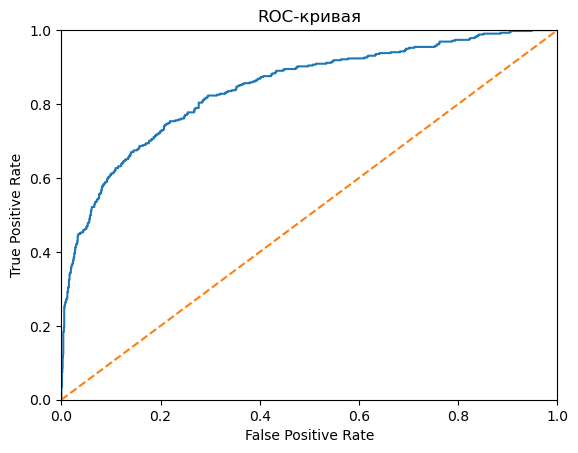

0.8422723643380372


In [50]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

#рассчитываю AUC-ROC
auc_roc = roc_auc_score(target_valid, probabilities_one_valid, multi_class='ovr')

print(auc_roc)

Из графика видно, что модель работает, и отличается от случайной.

### Уменьшаю выборку для борьбы с дисбалансом

In [51]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)

(2397, 11)
(2397,)


**Запускаю модель случайного леса на уменьшенной выборке**

In [52]:
%%time

best_model = None
best_result = 0
for est in range(1, 15):
    for depth in range(1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_downsampled, target_downsampled)
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_model = model
            best_result = result

print("F1 наилучшей модели на валидационной выборке:", best_result)
print ("Какие гиперпараметры дали наилучший результат:", best_model)

F1 наилучшей модели на валидационной выборке: 0.6060606060606061
Какие гиперпараметры дали наилучший результат: RandomForestClassifier(max_depth=4, n_estimators=9, random_state=12345)
Wall time: 3.97 s


В результате уменьшения выборки F1 увеличилось по сравнению с выборкой до ее уменьшения, но метод увеличения выборки дал лучший результат.

**Строю ROC кривую для модели случайного леса на уменьшенной выборке и рассчитываю AUC-ROC (насколько сильно модель отличается от случайной)**

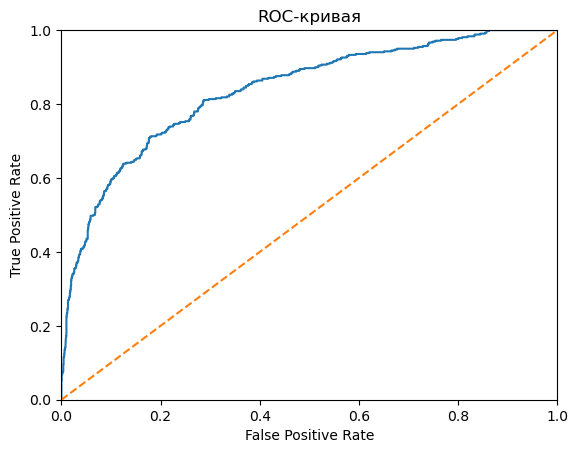

0.8365107761358344


In [53]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

#рассчитываю AUC-ROC
auc_roc = roc_auc_score(target_valid, probabilities_one_valid, multi_class='ovr')

print(auc_roc)

Из графика видно, что модель работает, и отличается от случайной.

## Тестирование модели

### Объединяю тренировочные и валидационные данные

In [54]:
features_train_valid = pd.concat([features_upsampled, features_valid])
target_train_valid = pd.concat([target_upsampled, target_valid])

In [55]:
print (features_train_valid.shape)
print (target_train_valid.shape)

(11588, 11)
(11588,)


### Проверяю на тестовой выборке модель случайного леса

In [56]:
model = RandomForestClassifier(max_depth=7, n_estimators=13, random_state=12345)
model.fit(features_train_valid, target_train_valid)
predictions = model.predict(features_test)

f1 = f1_score(target_test, predictions)
print ('F1 тестовой выборки случайного леса', f1)

F1 тестовой выборки случайного леса 0.6086956521739131


**Строю ROC кривую для модели случайного леса на тестовой выборке и рассчитываю AUC-ROC (насколько сильно модель отличается от случайной)**

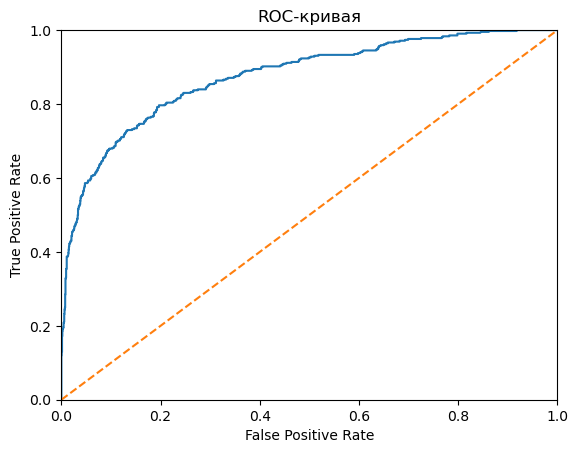

0.8744124994707202


In [57]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

#рассчитываю AUC-ROC
auc_roc = roc_auc_score(target_valid, probabilities_one_valid, multi_class='ovr')

print(auc_roc)

Из графика видно, что модель работает, и отличается от случайной.

### Строю график, показывающий какие факторы оказывают наибольшее влияние на модель

<AxesSubplot:>

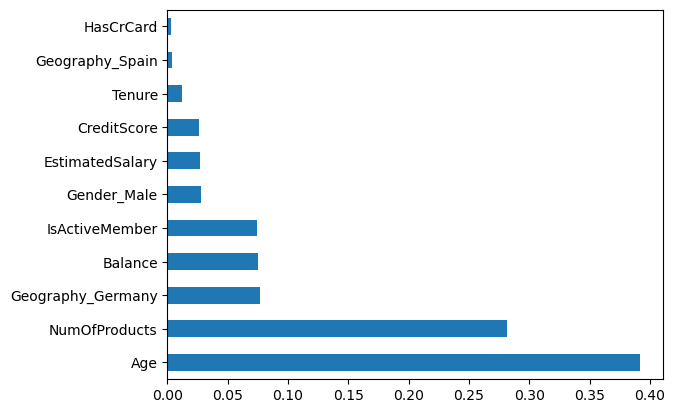

In [58]:
feat_importances = pd.Series(model.feature_importances_, index=features_train_valid.columns)
feat_importances.nlargest(20).plot(kind='barh')

Наибольшее влияние на модель оказывают такие факторы как "NumOfProducts" ("Количество продуктов, используемых клиентами") и "Age" ("Возраст") клиентов.

**Строю график, показывающий распределение клиентов банка по возрасту**

<AxesSubplot:>

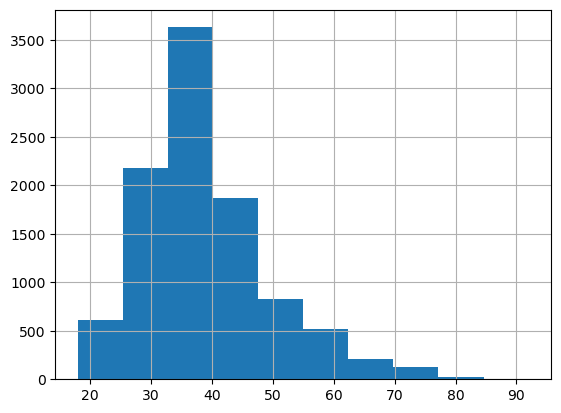

In [59]:
df['Age'].hist()

Наибольшее количество клиентов банка составляю люди в возрасте от 30 до 40 лет.

**Строю график распределения клиентов банка в зависимости от количества используемых ими продуктов**

<AxesSubplot:>

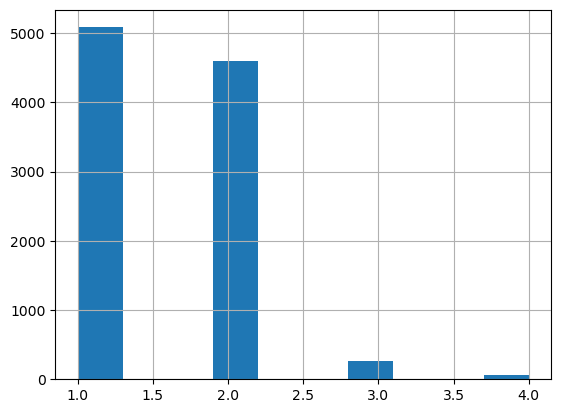

In [60]:
df['NumOfProducts'].hist()

**Строю график распределения клиентов в зависимости от баланса на их счете**

<AxesSubplot:>

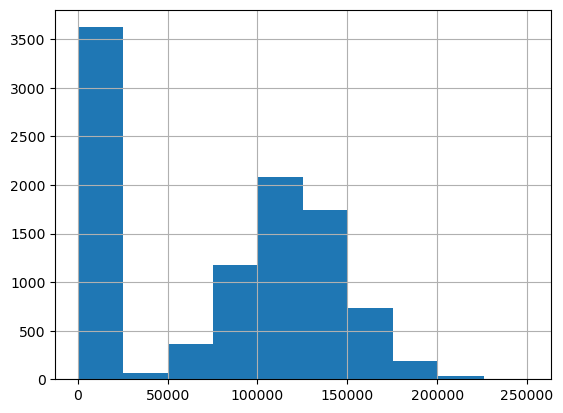

In [61]:
df['Balance'].hist()

**Строю график, показывающий зависимость между возрастом клиентов банка и количеством используемых продуктов банка**

<AxesSubplot:xlabel='Age', ylabel='NumOfProducts'>

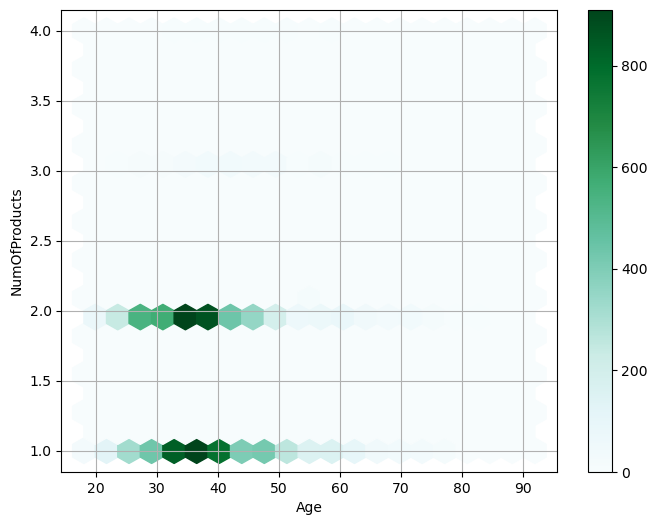

In [62]:
df[['Age', 'NumOfProducts']].plot(x='Age', y='NumOfProducts', kind='hexbin', \
                                  gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Подавлящее количество клиентов в возрасте от 30 до 40 лет пользуются одним или двумя продуктами банка.

Удалось достичь F1-меры не менее 0,59. Модель прошла тестирование и работает адекватно.

## Вывод

В работу поступила задача от "Бета-Банка", из которого ежемесячно стали уходить клиенты. Передо мной стояла задача спрогнозировать уйдет клиент из банка в ближайшее время или не уйдет.\
\
Для решения данной задачи я протестировала три модели: модель решающего дерева, модель случайного леса и модель логистической регрессии. Наилучший результат, т.е. наибольшее значение F1-меры, удалось достичь модели случайного леса на увеличенной выборке. ROC кривая также подтвердила, что модель работает и отличается от случайной. Тестирование модели подтвердило ее работоспособность (F1=0.61 на тестовых данных).\
\
Наибольшее количество клиентов банка - это люди в возрасте от 30 до 40 лет, которые пользуются одним или двумя продуктами банка.\
Наибольшее влияние на решение клиентов уйти или остаться оказали такие факторы как "NumOfProducts" ("Количество продуктов, используемых клиентов") и "Age" ("Возраст") клиентов банка.